# <center>**Predict Clicked Ads Customer Classification by using Machine Learning💼📊**</center>

---

<h2><center>Author: Bintang Phylosophie</center></h2>

# **Dataset**

## Dataset Information
This dataset appears to be about user behavior on a website, likely to explore how demographic and behavioral factors impact the likelihood of clicking on an ad. This dataset is from a fictional company from January to July in 2016. 


## Attribute Information
### Project Overview
A company in Indonesia wants to know the effectiveness of the advertisement they broadcast. This is important for the company to know how successful the advertisement being marketed is so that it can attract customers to see the advertisement.
By processing historical advertisement data and finding insights and patterns that occur, it can help companies determine marketing targets. The focus of this case is to create a machine learning classification model that functions to determine the right target customers.
### Identifier
This dataset does not contain an identifier, but it has a column called `Unnamed: 0`, which seems to function more as an index.
### Target
In this case, the target variable, `Clicked on Ad`, is already available and will be used as the target, categorized as "Yes" and "No"
### Company Goals
The goal of this project is to develop a machine learning classification model to predict whether a customer will click on an ad based on their demographic and behavioral data. By analyzing historical advertisement data, we aim to:
- Optimizing ad spend by targeting relevant users.
- Increasing ad engagement and conversion rates.
- Segmenting customers based on their behavior and demographics.

### Problems
The company wants to evaluate the effectiveness of its advertisements in attracting customer engagement. Understanding which customers are more likely to click on ads will help improve targeted marketing efforts and optimize advertising spend. However, the company currently lacks a systematic approach to identifying potential customers who are most likely to interact with their ads.
### Objectives

1. Identify key factors that influence ad clicks, such as time spent on the site, internet usage, age, income, and location.
2. Develop a predictive model to classify users into those who are likely to click on ads and those who are not.
3. Provide insights that can help the company refine its marketing strategies and improve ad targeting for better engagement.



<br>

The process will go through the following steps to achieve the objectives:
1. Data Understanding
2. Feature Engineering
3. Insight
4. Exploratory Data Analysis
5. Data Preprocessing
6. Machine Learning

Daily Time Spent on Site – The amount of time (in minutes) a user spends on the website daily.

Age – The user’s age.

Area Income – The average income of the user's geographical area.

Daily Internet Usage – The amount of time (in minutes) spent online daily.

Male – A binary indicator (1 = Male, 0 = Female).

Timestamp – The exact time when the user interacted with the ad.

Clicked on Ad – A binary label (1 = Clicked, 0 = Not Clicked).

City – The city where the user resides.

Province – The province/state of the user.

Category – The category of the ad displayed to the user.

# **Import Libraries**

In [161]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from datetime import datetime
from wordcloud import WordCloud
import plotly.express as px

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

#Scaling 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2

# Model
from sklearn.metrics import make_scorer, accuracy_score, f1_score, auc, roc_curve, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.inspection import permutation_importance

# **Data Understanding**

In [163]:
link = 'https://drive.google.com/uc?export=download&id=1WwLxmK8PMLjjgG_Zh1Nkh02ZN2-3Wiyl'
df = pd.read_csv(link)
print('shape of the data:', df.shape)
df.head()

shape of the data: (1000, 11)


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [165]:
df.columns

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category'],
      dtype='object')

In [81]:
cat_var = df.select_dtypes(include=['object', 'category']).columns
num_var = df.select_dtypes(include=np.number)

In [82]:
num_var.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [83]:
df[cat_var].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [84]:
# pengecekan keseluruhan dataframe
def percent_null(series):
    total_nulls = (series.isnull() | (series == ' ')).sum()

    percent = (total_nulls / len(series)) * 100

    if percent == 0:
        return '0'
    else:
        return f'{percent:.2f}'

summary_data = []

for col in df.columns:
    column_summary = {
        'Column Name': col,
        '%null': str(percent_null(df[col]))+"%",
        'dtype': df[col].dtype,
        'count': df[col].count(),
        'nunique': df[col].nunique(),
        'mode': df[col].mode().values if not df[col].mode().empty else None,
        'unique value': list(df[col].value_counts().to_dict().keys())
    }
    summary_data.append(column_summary)
pd.DataFrame(summary_data)

,Column Name,%null,dtype,count,nunique,mode,unique value
0,Unnamed: 0,0%,int64,1000,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 671, 658, 659, 660, 661, 662, 663, 664, 66..."
1,Daily Time Spent on Site,1.30%,float64,987,890,"[62.26, 75.55, 77.05, 78.76, 84.53]","[84.53, 75.55, 78.76, 77.05, 62.26, 70.92, 43...."
2,Age,0%,int64,1000,43,[31],"[31, 36, 28, 29, 33, 35, 30, 34, 32, 26, 38, 3..."
3,Area Income,1.30%,float64,987,987,"[97975500.0, 101836420.0, 103428500.0, 1091880...","[432837300.0, 265358030.0, 422206330.0, 471261..."
4,Daily Internet Usage,1.10%,float64,989,955,"[113.53, 115.91, 117.3, 119.3, 120.06, 125.45,...","[215.18, 167.22, 162.44, 228.81, 125.45, 219.7..."
5,Male,0.30%,object,997,2,[Perempuan],"[Perempuan, Laki-Laki]"
6,Timestamp,0%,object,1000,997,"[5/20/2016 12:17, 5/26/2016 15:40, 5/30/2016 8...","[5/26/2016 15:40, 5/30/2016 8:02, 5/20/2016 12..."
7,Clicked on Ad,0%,object,1000,2,"[No, Yes]","[No, Yes]"
8,city,0%,object,1000,30,"[Bandung, Surabaya]","[Surabaya, Bandung, Jakarta Timur, Jakarta Sel..."
9,province,0%,object,1000,16,[Daerah Khusus Ibukota Jakarta],"[Daerah Khusus Ibukota Jakarta, Jawa Barat, Ja..."


In [85]:

for col in df.columns:
    print(df[col].unique())



[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [86]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [87]:
df.nunique()

Unnamed: 0                  1000
Daily Time Spent on Site     890
Age                           43
Area Income                  987
Daily Internet Usage         955
Male                           2
Timestamp                    997
Clicked on Ad                  2
city                          30
province                      16
category                      10
dtype: int64

In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# **Data Preprocessing**

## Handling missing value

In [90]:
missing_values_count = df.isnull().sum()

missing_values_count

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [91]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Sort columns by the percentage of missing values in descending order
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)
print('missing values percentage')
missing_values_percentage

missing values percentage


Daily Time Spent on Site    1.3
Area Income                 1.3
Daily Internet Usage        1.1
Male                        0.3
Age                         0.0
Timestamp                   0.0
Clicked on Ad               0.0
city                        0.0
province                    0.0
category                    0.0
dtype: float64

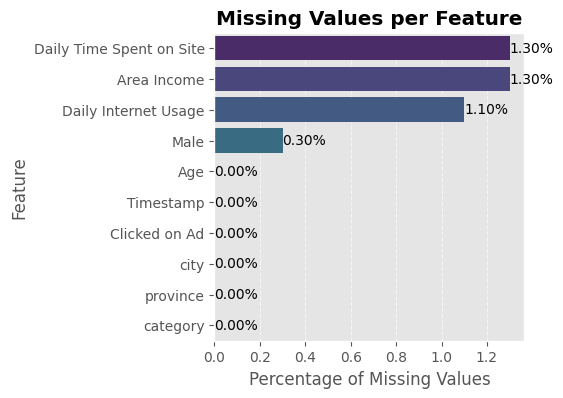

In [92]:

# Create the horizontal bar chart
plt.figure(figsize=(4, 4))
sns.barplot(x=missing_values_percentage, y=missing_values_percentage.index, palette="viridis")

# Add percentage labels to the bars
for index, value in enumerate(missing_values_percentage):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize=10)

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Feature')
plt.title('Missing Values per Feature', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Based on the distribution of the features in the graph, the best way to fill missing values would depend on their respective distributions:

- **Daily Time Spent on Site:**

Slightly skewed left. Use the mean to fill missing values as it represents the central tendency and the distribution is fairly normal.

- **Age:**

Skewed slightly right. Use the median since the median is robust to outliers and better represents the center in skewed distributions.

- **Area Income:**

Skewed left but close to normal. Use the mean, as it provides a good measure of central tendency for this distribution.

- **Daily Internet Usage:**

Close to symmetric. Use the mean, since it is appropriate for normally distributed data.
- **Male** 

This feature is the only missing value with categorical datatype, and I will fill with mode

In [93]:
# Fill missing values for each column based on their distributions
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Area Income'].fillna(df['Area Income'].mode(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)
df['Male'].fillna(df['Male'].mode()[0], inplace=True)

In [94]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## Checking outlier

In [95]:
cat_var = df.select_dtypes(include=['object', 'category']).columns
num_var = df.select_dtypes(include=np.number)

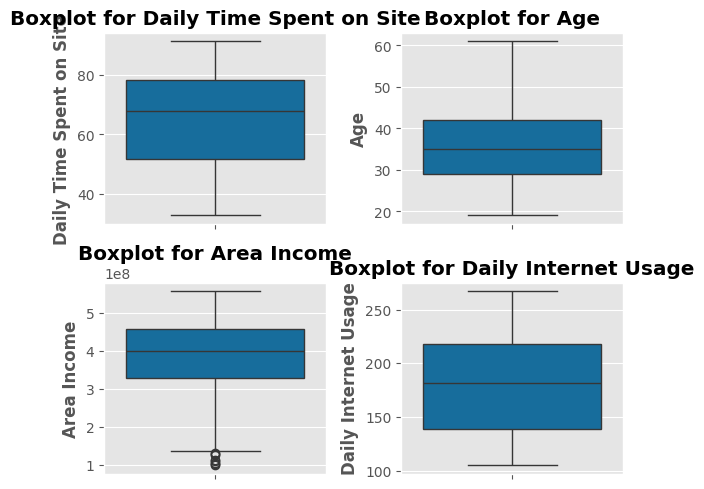

In [96]:
# Set a colorblind-friendly palette
palette = sns.color_palette("colorblind")

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(6, 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature column
for i, column_name in enumerate(num_var):
    # Create a vertical boxplot with the specified palette
    sns.boxplot(data=df, y=column_name, ax=axes[i], palette=palette)
    axes[i].set_title(f'Boxplot for {column_name}', fontweight='bold')
    axes[i].set_ylabel(column_name, fontweight='bold')
    axes[i].set_xlabel('')

# Hide any empty subplots
for i in range(len(num_var), 4):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [97]:
cat_var_for_visualize = ['Male', 'Clicked on Ad', 'city', 'province', 'category']

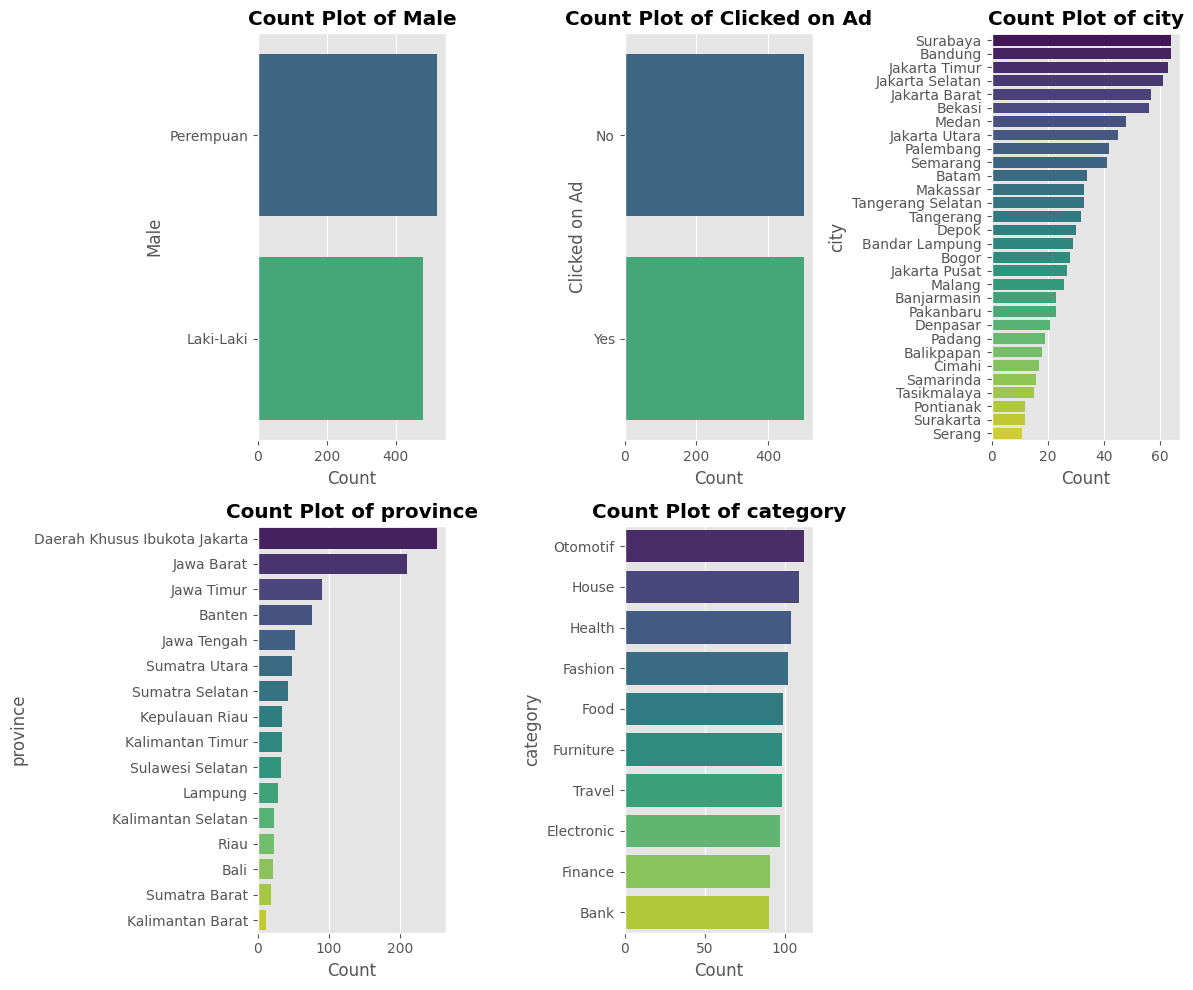

In [98]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a 2x3 grid of subplots for count plots
for i, column in enumerate(cat_var_for_visualize):
    plt.subplot(2, 3, i + 1)

    # Convert the column to a string type
    df[column] = df[column].astype(str)

    # Calculate the count of each category and sort them in descending order of frequency
    category_counts = df[column].value_counts().sort_values(ascending=False)

    # Create the count plot
    sns.countplot(data=df, y=column, order=category_counts.index, palette='viridis')

    # Set labels and title
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.title(f'Count Plot of {column}', fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Show


# **Feature Engineering**

## column: Timestamp

In [99]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Male                      1000 non-null   object        
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   object        
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 78.3+ KB


In [101]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance


In [102]:
df['Timestamp_month'] = df['Timestamp'].dt.month
df['Timestamp_day'] = df['Timestamp'].dt.day
df['HourOfDay'] = df['Timestamp'].dt.hour

## column: Age

In [103]:
df['Age'].describe()

count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64

In [104]:
bins = [0, 30, 43, 63]
labels = ['Young', 'Adult', 'old']
df['AgeCategory'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [105]:
df['AgeCategory'] 

0      Adult
1      Adult
2      Young
3      Young
4      Adult
       ...  
995    Young
996      old
997      old
998    Young
999    Young
Name: AgeCategory, Length: 1000, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'old']

In [106]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Timestamp_month,Timestamp_day,HourOfDay,AgeCategory
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,27,0,Adult
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,4,4,1,Adult
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,3,13,20,Young
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,1,10,2,Young
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,6,3,3,Adult


## column: TimeSpentToInternetUsage

In [107]:

# Time Spent on Site to Internet Usage ratio
df['TimeSpentToInternetUsage'] = df['Daily Time Spent on Site'] / df['Daily Internet Usage']


In [108]:
df['TimeSpentToInternetUsage'] .sample(10)

268    0.234487
983    0.352583
168    0.568715
731    0.247282
162    0.286892
17     0.437423
618    0.235150
739    0.457958
517    0.626817
794    0.411730
Name: TimeSpentToInternetUsage, dtype: float64

# **Insight**

In [109]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'Timestamp_month', 'Timestamp_day', 'HourOfDay',
       'AgeCategory', 'TimeSpentToInternetUsage'],
      dtype='object')

In [110]:
df['Clicked on Ad']

0       No
1       No
2       No
3       No
4       No
      ... 
995    Yes
996    Yes
997    Yes
998     No
999    Yes
Name: Clicked on Ad, Length: 1000, dtype: object

## 1. Percentage of Clicked Ads

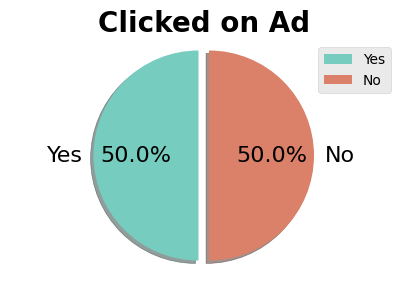

In [111]:
plt.figure(figsize=(5,3), facecolor='none')
my_labels = 'Yes','No'
my_colors = ['#76ccbf','#db8069']
my_explode = (0, 0.1)
plt.pie(df['Clicked on Ad'].value_counts(), labels=my_labels, autopct='%1.1f%%', startangle=90, shadow = True, colors=my_colors, explode=my_explode, textprops={'fontsize': 16})
plt.title('Clicked on Ad', fontsize=20, fontweight='bold')
plt.axis('equal')
plt.legend()
plt.show()

## 2. Number of Clicks on Ads by Hour of the Day

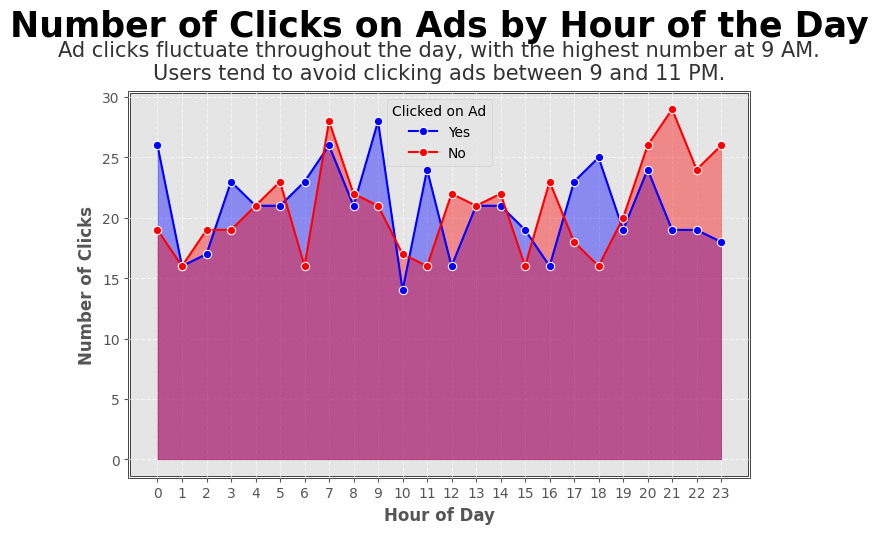

In [112]:

# Group data by 'HourOfDay' and 'Clicked on Ad', then count occurrences
click_counts = df.groupby(['HourOfDay', 'Clicked on Ad']).size().unstack()

# Set figure size
fig, ax = plt.subplots(figsize=(8, 5))

# Plot both lines with specific colors and solid lines
sns.lineplot(x=click_counts.index, y=click_counts['Yes'], color='blue', linestyle='-', marker='o', label="Yes")  # Clicked on Ad = Yes
sns.lineplot(x=click_counts.index, y=click_counts['No'], color='red', linestyle='-', marker='o', label="No")   # Clicked on Ad = No

plt.fill_between(click_counts.index, click_counts['Yes'], color='blue', alpha=0.4)
plt.fill_between(click_counts.index, click_counts['No'], color='red', alpha=0.4)

# Set labels and title
ax.set_xlabel("Hour of Day", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Clicks", fontsize=12, fontweight='bold')
ax.set_title("Number of Clicks on Ads by Hour of the Day", fontsize=25, fontweight='bold', pad=40,  ha='center')
x_center = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2

# Adjust description placement below the title and center it
desc = 'Ad clicks fluctuate throughout the day, with the highest number at 9 AM.\nUsers tend to avoid clicking ads between 9 and 11 PM.'
ax.text(x_center, ax.get_ylim()[1] + 1, desc, fontsize=15, alpha=0.8, ha='center')


# Customize legend
ax.legend(title="Clicked on Ad")
ax.patch.set_edgecolor('black')  # Set border color
ax.patch.set_linewidth(2) 

# Show grid and ensure all hours are shown
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(df['HourOfDay'].min(), df['HourOfDay'].max() + 1))  

# Show plot
plt.show()


## 3. Number of Clicks on Ads by Day of the Month

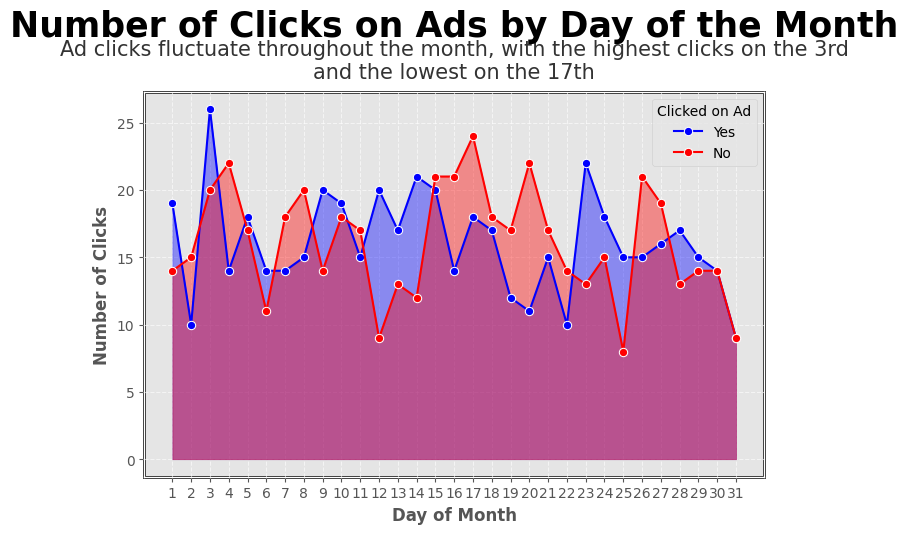

In [113]:
# Group data by 'HourOfDay' and 'Clicked on Ad', then count occurrences
click_counts_day = df.groupby(['Timestamp_day', 'Clicked on Ad']).size().unstack()

# Set figure size
fig, ax = plt.subplots(figsize=(8, 5))

# Plot both lines with specific colors and solid lines
sns.lineplot(x=click_counts_day.index, y=click_counts_day['Yes'], color='blue', linestyle='-', marker='o', label="Yes")  # Clicked on Ad = Yes
sns.lineplot(x=click_counts_day.index, y=click_counts_day['No'], color='red', linestyle='-', marker='o', label="No")   # Clicked on Ad = No

plt.fill_between(click_counts_day.index, click_counts_day['Yes'], color='blue', alpha=0.4)
plt.fill_between(click_counts_day.index, click_counts_day['No'], color='red', alpha=0.4)


# Set labels and title
ax.set_xlabel("Day of Month", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Clicks", fontsize=12, fontweight='bold')
ax.set_title('Number of Clicks on Ads by Day of the Month', fontsize=25, fontweight='bold', pad=40,  ha='center')
x_center = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2

# Adjust description placement below the title and center it
desc = 'Ad clicks fluctuate throughout the month, with the highest clicks on the 3rd\nand the lowest on the 17th'
ax.text(x_center, ax.get_ylim()[1] + 1, desc, fontsize=15, alpha=0.8, ha='center')


# Customize legend
ax.legend(title="Clicked on Ad")
ax.patch.set_edgecolor('black')  # Set border color
ax.patch.set_linewidth(2) 

# Show grid and ensure all hours are shown
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(df['Timestamp_day'].min(), df['Timestamp_day'].max() + 1))  

# Show plot
plt.show()



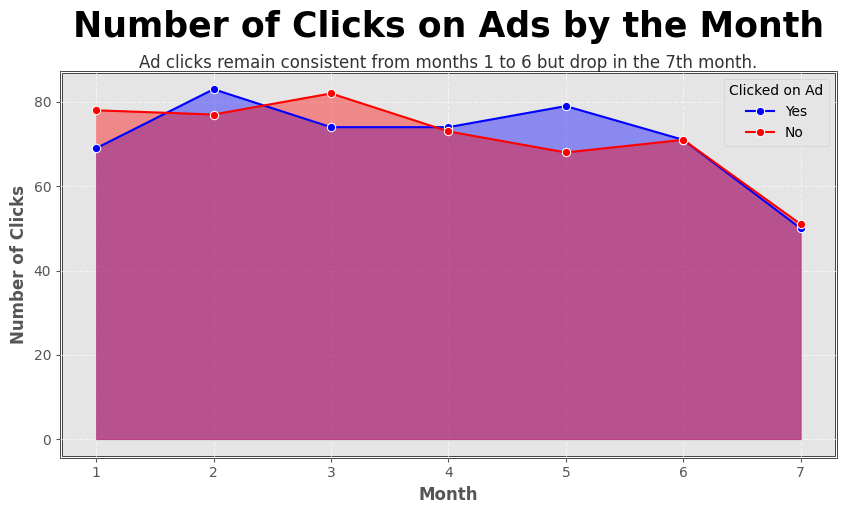

In [114]:
# Group data by 'HourOfDay' and 'Clicked on Ad', then count occurrences
click_counts_month = df.groupby(['Timestamp_month', 'Clicked on Ad']).size().unstack()

# Set figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Plot both lines with specific colors and solid lines
sns.lineplot(x=click_counts_month.index, y=click_counts_month['Yes'], color='blue', linestyle='-', marker='o', label="Yes")  # Clicked on Ad = Yes
sns.lineplot(x=click_counts_month.index, y=click_counts_month['No'], color='red', linestyle='-', marker='o', label="No")   # Clicked on Ad = No

plt.fill_between(click_counts_month.index, click_counts_month['Yes'], color='blue', alpha=0.4)
plt.fill_between(click_counts_month.index, click_counts_month['No'], color='red', alpha=0.4)


# Set labels and title
ax.set_xlabel("Month", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Clicks", fontsize=12, fontweight='bold')
ax.set_title('Number of Clicks on Ads by the Month', fontsize=25, fontweight='bold', pad=25,  ha='center')
x_center = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2

# Adjust description placement below the title and center it
desc = 'Ad clicks remain consistent from months 1 to 6 but drop in the 7th month.'
ax.text(x_center, ax.get_ylim()[1] + 1, desc, fontsize=12, alpha=0.8, ha='center')
ax.patch.set_edgecolor('black')  # Set border color
ax.patch.set_linewidth(2) 


# Customize legend
ax.legend(title="Clicked on Ad")

# Show grid and ensure all hours are shown
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(df['Timestamp_month'].min(), df['Timestamp_month'].max() + 1))  

# Show plot
plt.show()



In [115]:
# redefine the data type
cat_var = df.select_dtypes(include=['object']).columns

# set the numerical columns
import numpy as np
num_var = df.select_dtypes(include=np.number)

## 4. Number of Clicks on Ads by Day and Age Category

In [116]:
df['Day'] = df['Timestamp'].dt.day_name()

In [117]:
df['Clicked on Ad'] = df['Clicked on Ad'].map({'Yes': 1, 'No': 0})

<Figure size 800x500 with 0 Axes>

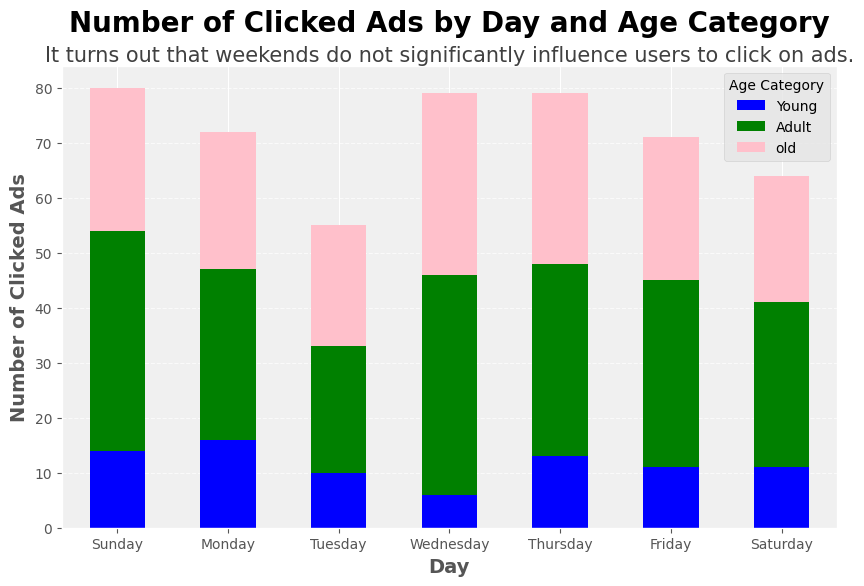

In [118]:
plt.figure(figsize=(8, 5))

# Define day order (starting from Sunday)
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Filter only clicked ads
clicked_ads = df[df['Clicked on Ad'] == 1]

# Convert timestamp to day name
clicked_ads['Day'] = pd.to_datetime(clicked_ads['Timestamp']).dt.day_name()

# Count occurrences of each age category per day
stacked_data = clicked_ads.groupby(['Day', 'AgeCategory']).size().unstack(fill_value=0)

# Reorder the index to start from Sunday
stacked_data = stacked_data.reindex(day_order)

# Define custom colors for age categories
colors = {'Young': 'blue', 'Adult': 'green', 'old': 'pink'}

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set background color for the chart area
ax.set_facecolor('#f0f0f0')  # Light grey background

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, color=[colors[col] for col in stacked_data.columns], ax=ax)

desc="It turns out that weekends do not significantly influence users to click on ads."
y_start, y_end = plt.gca().get_ylim()
ax.text(
    (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2,  # Centering the text
    y_end*1.01 ,  # Slightly below y-axis
    desc, ha='center', fontsize=15, alpha=0.75
)
# Customize plot
ax.set_xlabel("Day", fontsize=14, fontweight='bold')
ax.set_ylabel("Number of Clicked Ads", fontsize=14, fontweight='bold')
ax.set_title("Number of Clicked Ads by Day and Age Category", fontsize=20, fontweight='bold', pad=25)
ax.legend(title="Age Category")

# Customize grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve readability
plt.xticks(rotation=0)

# Show plot
plt.show()


In [119]:
df.drop(['Day'], axis=1, inplace=True)

## 5. Percentage of Users who Click on Ads by Province

In [120]:


# 1. Group by 'province' and calculate the number of clicks and total users per region
region_counts = df.groupby('province').agg(
    total_users=('Clicked on Ad', 'size'),
    clicked_ads=('Clicked on Ad', 'sum')
).reset_index()

# Calculate the percentage of users who clicked on the ad in each region
region_counts['percentage_clicked_ad'] = (region_counts['clicked_ads'] / region_counts['total_users']) * 100

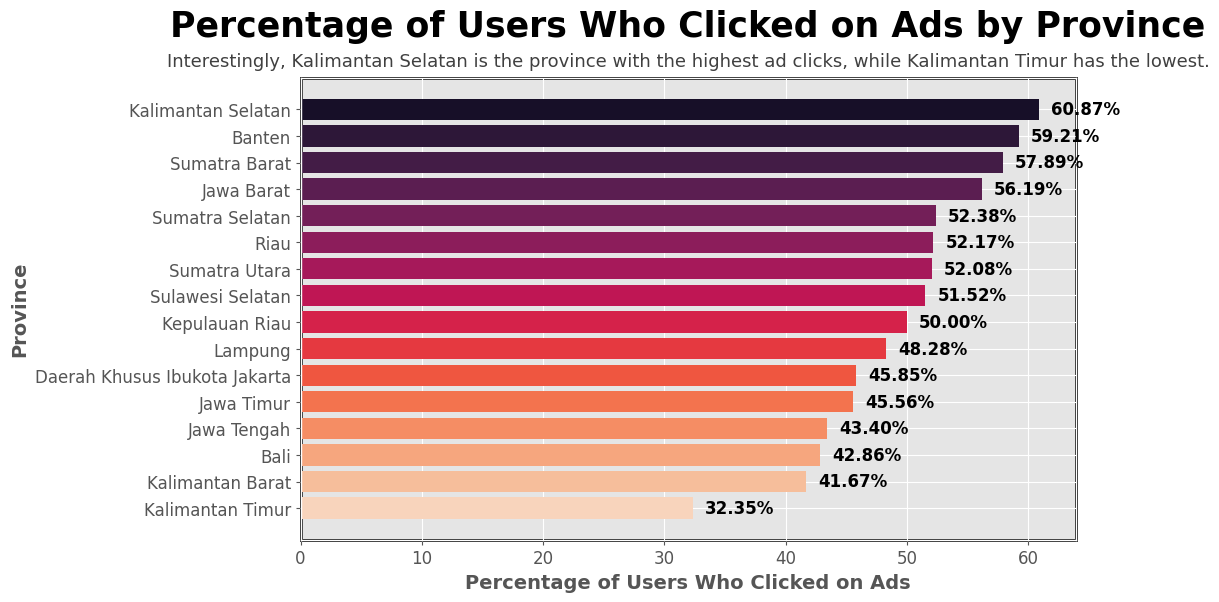

In [121]:
sorted_region_data = region_counts.sort_values(by='percentage_clicked_ad', ascending=False)
colors = sns.color_palette('rocket', len(sorted_region_data))

fig, ax = plt.subplots(figsize=(10, 6))

# Create the horizontal bar chart
ax.barh(sorted_region_data['province'], sorted_region_data['percentage_clicked_ad'], color=colors)

# Set labels and title with improved wording
ax.set_xlabel('Percentage of Users Who Clicked on Ads', fontsize=14, fontweight='bold')
ax.set_ylabel('Province', fontsize=14, fontweight='bold')
ax.set_title('Percentage of Users Who Clicked on Ads by Province', fontsize=25, fontweight='bold', pad=30)
x_center = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2

# Adjust description placement below the title and center it
x_start, x_end = plt.gca().get_xlim()
desc = 'Interestingly, Kalimantan Selatan is the province with the highest ad clicks, while Kalimantan Timur has the lowest.'
plt.text((x_start+x_end)/2, ax.get_ylim()[1] * -0.1, desc, ha='center', fontsize=13, alpha=0.75)

# Customize tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Reverse the order of regions for better readability
ax.invert_yaxis()

# Add labels to the bars
for i, percentage in enumerate(sorted_region_data['percentage_clicked_ad']):
    ax.text(percentage + 1, i, f'{percentage:.2f}%', va='center', ha='left', fontsize=12, fontweight='bold')

# Show the plot
ax.patch.set_edgecolor('black')  # Set border color
ax.patch.set_linewidth(2) 
plt.show()


## 6. Percentage of Users who Click on Ads by City

In [122]:
# 1. Group by 'province' and calculate the number of clicks and total users per region
city_counts = df.groupby('city').agg(
    total_users=('Clicked on Ad', 'size'),
    clicked_ads=('Clicked on Ad', 'sum')
).reset_index()

# Calculate the percentage of users who clicked on the ad in each region
city_counts['percentage_clicked_ad'] = (city_counts['clicked_ads'] / city_counts['total_users']) * 100

# 3. Sort regions based on percentage_clicked_ad in descending order
sorted_city_data = city_counts.sort_values(by='percentage_clicked_ad', ascending=False)

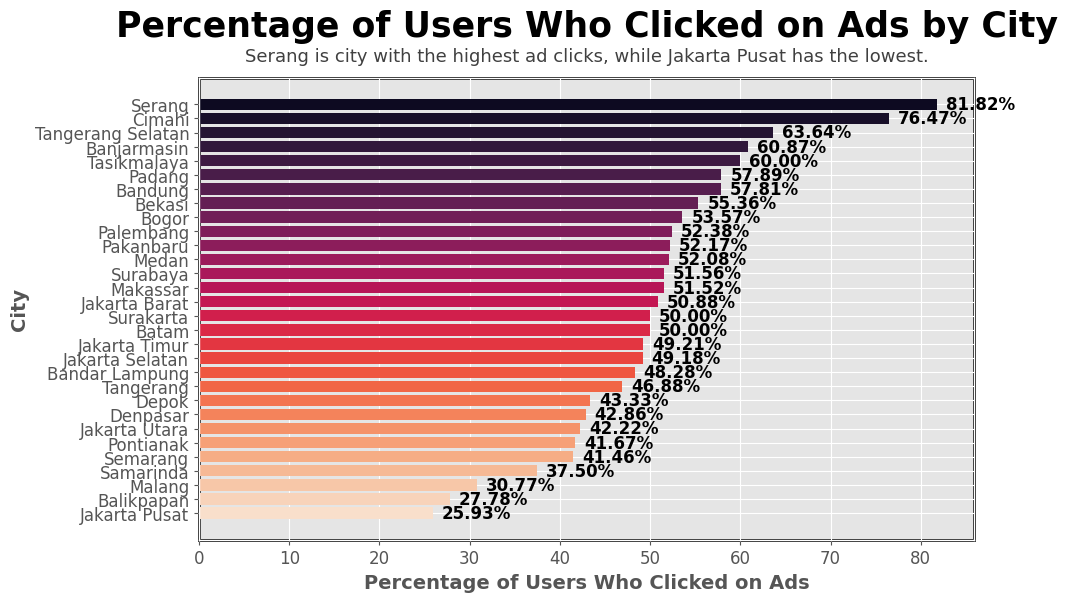

In [123]:
sorted_city_data = city_counts.sort_values(by='percentage_clicked_ad', ascending=False)
colors = sns.color_palette('rocket', len(sorted_city_data))

fig, ax = plt.subplots(figsize=(10, 6))

# Create the horizontal bar chart
ax.barh(sorted_city_data['city'], sorted_city_data['percentage_clicked_ad'], color=colors)

# Set labels and title with improved wording
ax.set_xlabel('Percentage of Users Who Clicked on Ads', fontsize=14, fontweight='bold')
ax.set_ylabel('City', fontsize=14, fontweight='bold')
ax.set_title('Percentage of Users Who Clicked on Ads by City', fontsize=25, fontweight='bold', pad=30)
x_center = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2

# Adjust description placement below the title and center it
x_start, x_end = plt.gca().get_xlim()
desc = 'Serang is city with the highest ad clicks, while Jakarta Pusat has the lowest.'
plt.text((x_start+x_end)/2, ax.get_ylim()[1] * -0.1, desc, ha='center', fontsize=13, alpha=0.75)

# Customize tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Reverse the order of regions for better readability
ax.invert_yaxis()

# Add labels to the bars
for i, percentage in enumerate(sorted_city_data['percentage_clicked_ad']):
    ax.text(percentage + 1, i, f'{percentage:.2f}%', va='center', ha='left', fontsize=12, fontweight='bold')
ax.patch.set_edgecolor('black')  # Set border color
ax.patch.set_linewidth(2) 
# Show the plot
plt.show()






In [124]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'Timestamp_month', 'Timestamp_day', 'HourOfDay',
       'AgeCategory', 'TimeSpentToInternetUsage'],
      dtype='object')

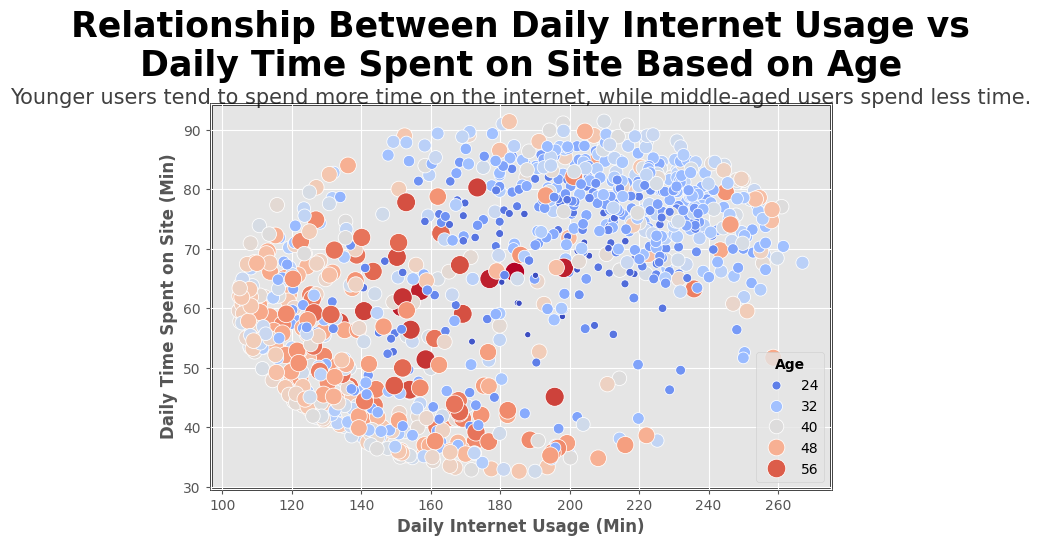

In [125]:
# Scatter plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(
    x=df['Daily Internet Usage'], 
    y=df['Daily Time Spent on Site'], 
    hue=df['Age'],
    palette="coolwarm",
    size=df['Age'], 
    sizes=(20, 200)
)

# Description text
desc = "Younger users tend to spend more time on the internet, while middle-aged users spend less time."
ax.text(
    (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2,  # Centering the text
    ax.get_ylim()[-1] ,  # Slightly below y-axis
    desc, ha='center', fontsize=15, alpha=0.75
)

# Titles and labels
ax.set_title("Relationship Between Daily Internet Usage vs\nDaily Time Spent on Site Based on Age", 
             fontsize=25, fontweight='bold', pad=20)
ax.set_xlabel("Daily Internet Usage (Min)", fontweight='bold')
ax.set_ylabel("Daily Time Spent on Site (Min)", fontweight='bold')
ax.patch.set_edgecolor('black')  # Set border color
ax.patch.set_linewidth(2) 

# Bold legend title
ax.legend(title="Age", title_fontproperties=FontProperties(weight='bold'))

plt.show()


## 7. Relationship Between Daily Internet Usage vs\nDaily Time Spent on Site Based on Clicking on Ad

In [126]:
df['Clicked on Ad'] = df['Clicked on Ad'].map({1: 'Yes', 0: 'No'})

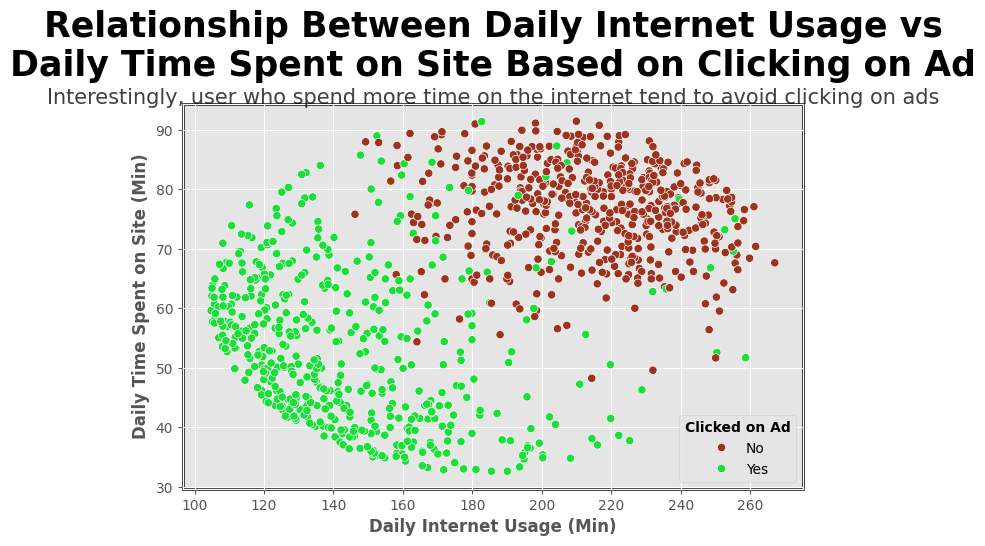

In [127]:
custom_palette = {'No': "#9c331e", 'Yes': "#1bde38"}
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(
    x=df['Daily Internet Usage'], 
    y=df['Daily Time Spent on Site'], 
    hue=df['Clicked on Ad'],
    palette=custom_palette,
    sizes=(20, 200)
)

# Description text
desc = "Interestingly, user who spend more time on the internet tend to avoid clicking on ads"
ax.text(
    (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2,  # Centering the text
    ax.get_ylim()[-1] ,  # Slightly below y-axis
    desc, ha='center', fontsize=15, alpha=0.75
)

# Titles and labels
ax.set_title("Relationship Between Daily Internet Usage vs\nDaily Time Spent on Site Based on Clicking on Ad", 
             fontsize=25, fontweight='bold', pad=20)
ax.set_xlabel("Daily Internet Usage (Min)", fontweight='bold')
ax.set_ylabel("Daily Time Spent on Site (Min)", fontweight='bold')

# Bold legend title
ax.legend(title="Clicked on Ad", title_fontproperties=FontProperties(weight='bold'))
ax.patch.set_edgecolor('black')  # Set border color
ax.patch.set_linewidth(2) 

plt.show()


# **Exploratory Data Analysis**

In [128]:
df['Clicked on Ad'] = df['Clicked on Ad'].map({'Yes': 1, 'No': 0})

In [129]:
# redefine the data type
cat_var = df.select_dtypes(include=['object', 'category']).columns
num_var = df.select_dtypes(include=np.number)

## Multivariate Analysis

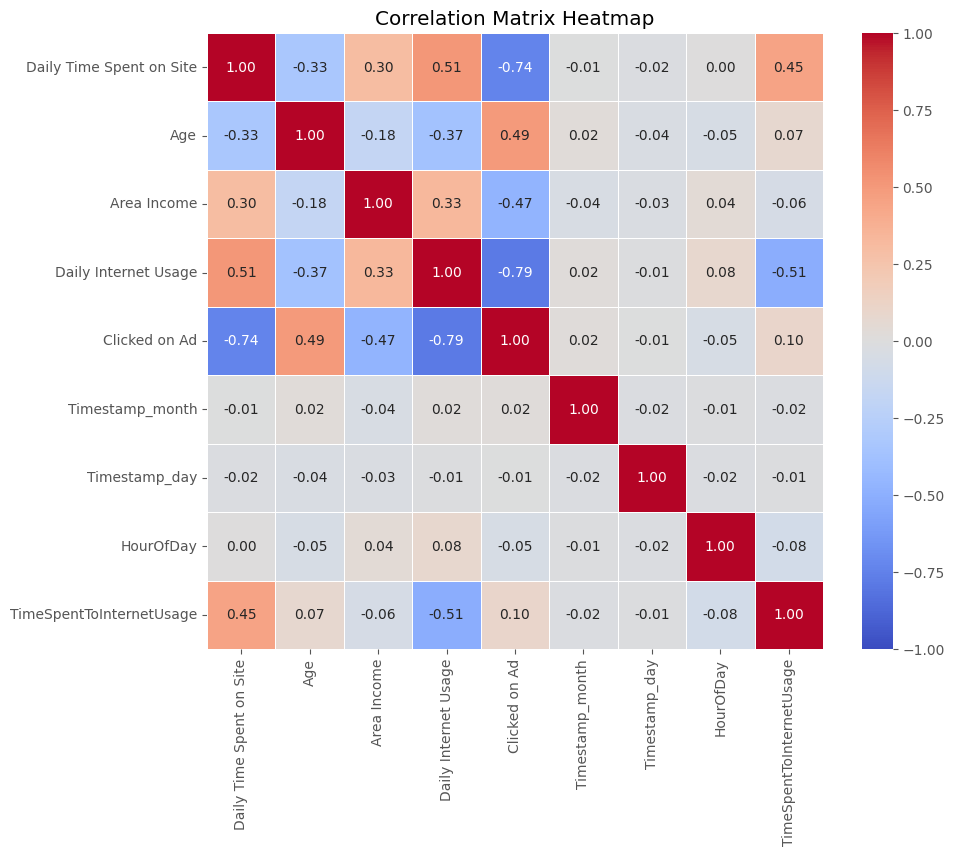

In [130]:
df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
            linewidths=0.5, square=True, vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

## Univariate Analysis

### numerical

In [131]:
num_var.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad', 'Timestamp_month',
       'Timestamp_day', 'HourOfDay', 'TimeSpentToInternetUsage'],
      dtype='object')

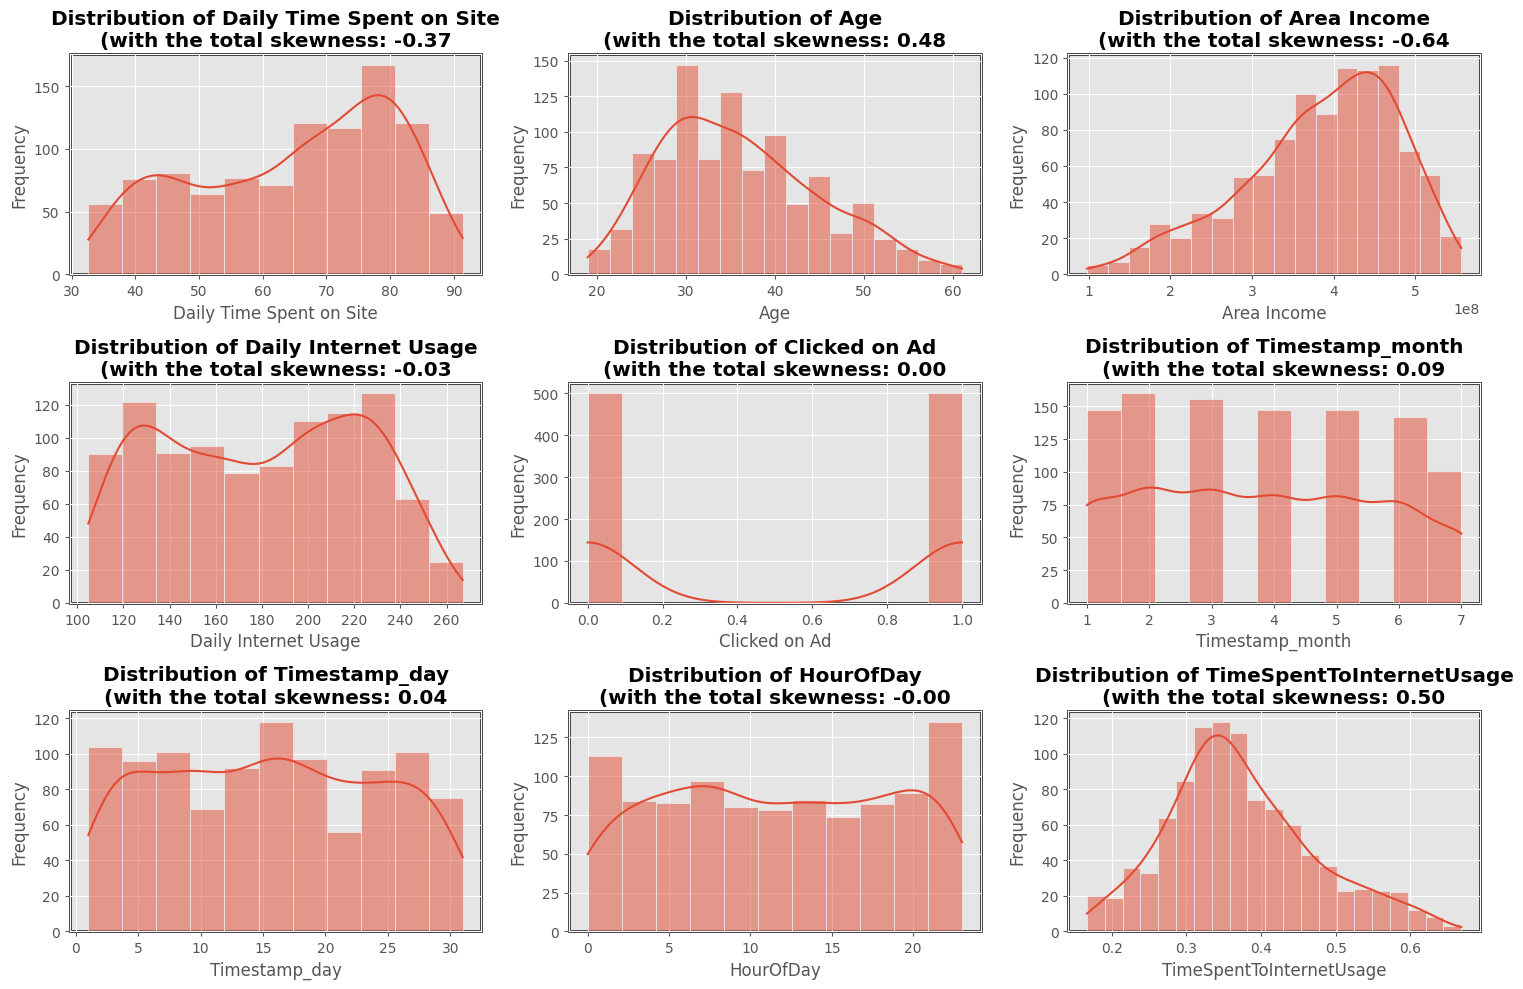

In [132]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.flatten()

# Setting the skew for numerical columns
for i, column_name in enumerate(num_var):
    skewness = df[column_name].skew()

    # Setting the histogram plot
    sns.histplot(data=df, x=column_name, kde= True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column_name}\n(with the total skewness: {skewness:.2f}', fontweight='bold')
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Frequency')
    ax[i].patch.set_edgecolor('black')  # Set border color
    ax[i].patch.set_linewidth(2) 

# Hide any empty subplots
for i in range(len(num_var), 6):
    fig.delaxes(ax[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### categorical

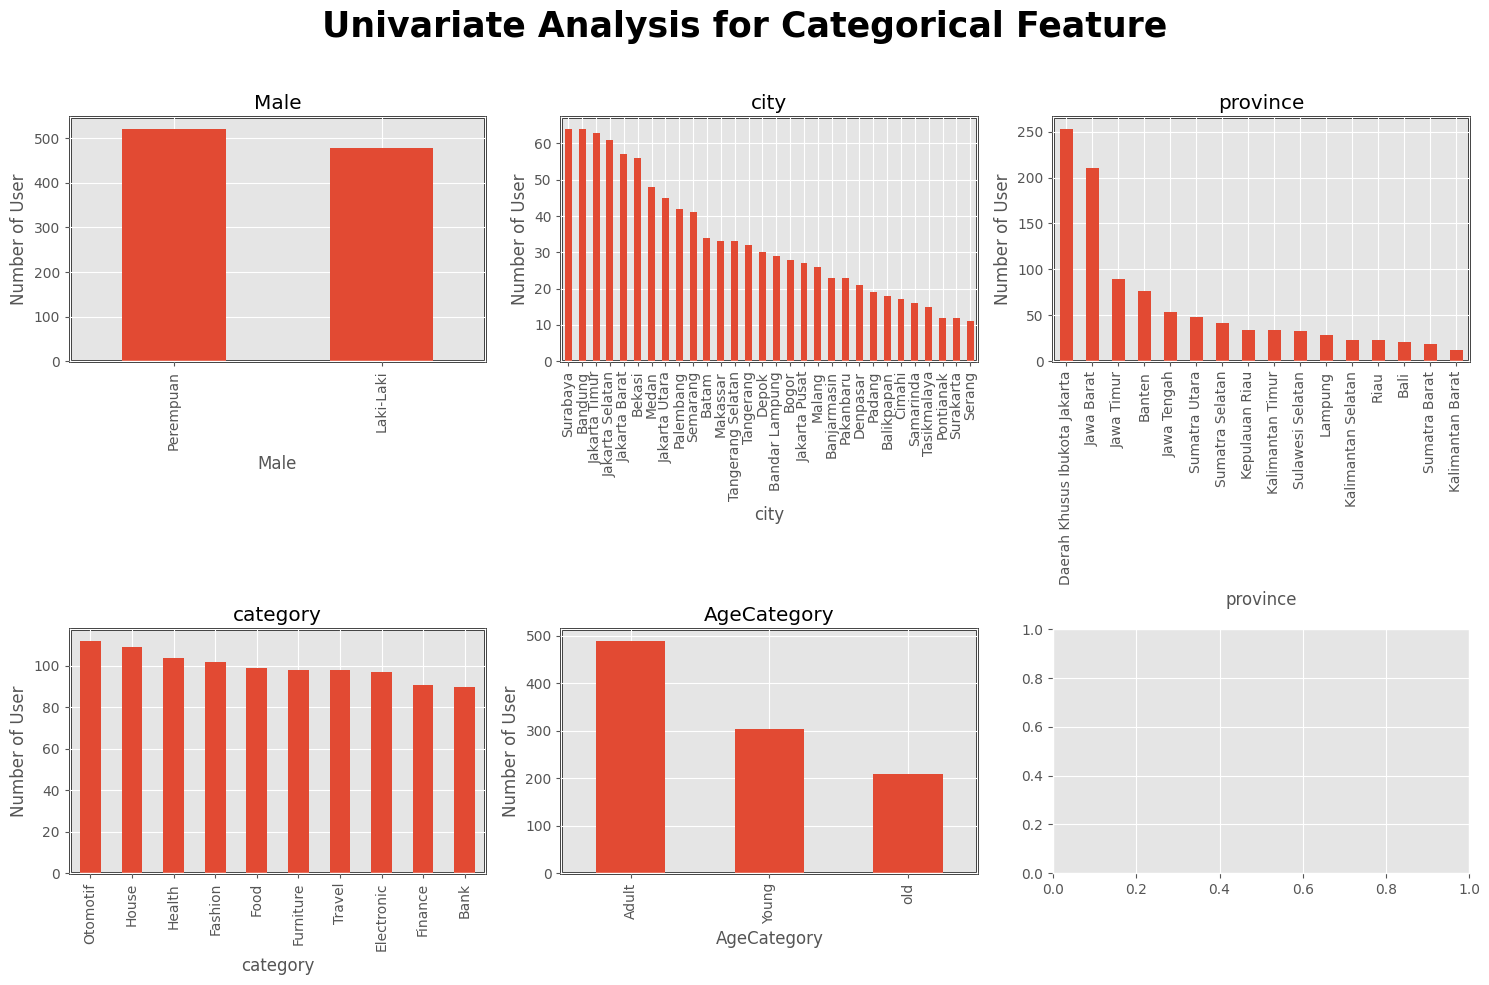

In [160]:

# Set style for plots
plt.style.use('ggplot')

# Number of rows and columns for the subplot grid
n_rows, n_cols = 2, 3

# Create the figure and subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Title for the entire figure
fig.suptitle('Univariate Analysis for Categorical Feature', fontsize=25, fontweight='bold')

# Iterate through each categorical variable and plot
for i, column in enumerate(cat_var):
    ax = axes[i]  # Select the appropriate subplot axis

    # Plot value counts as a bar plot for the current column
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Number of User', fontsize=12)
    ax.set_title(column)

    # Add a border to the subplot
    ax.patch.set_edgecolor('black')  # Set border color
    ax.patch.set_linewidth(2) 


plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap with title
plt.show()


## Bivariate Analysis

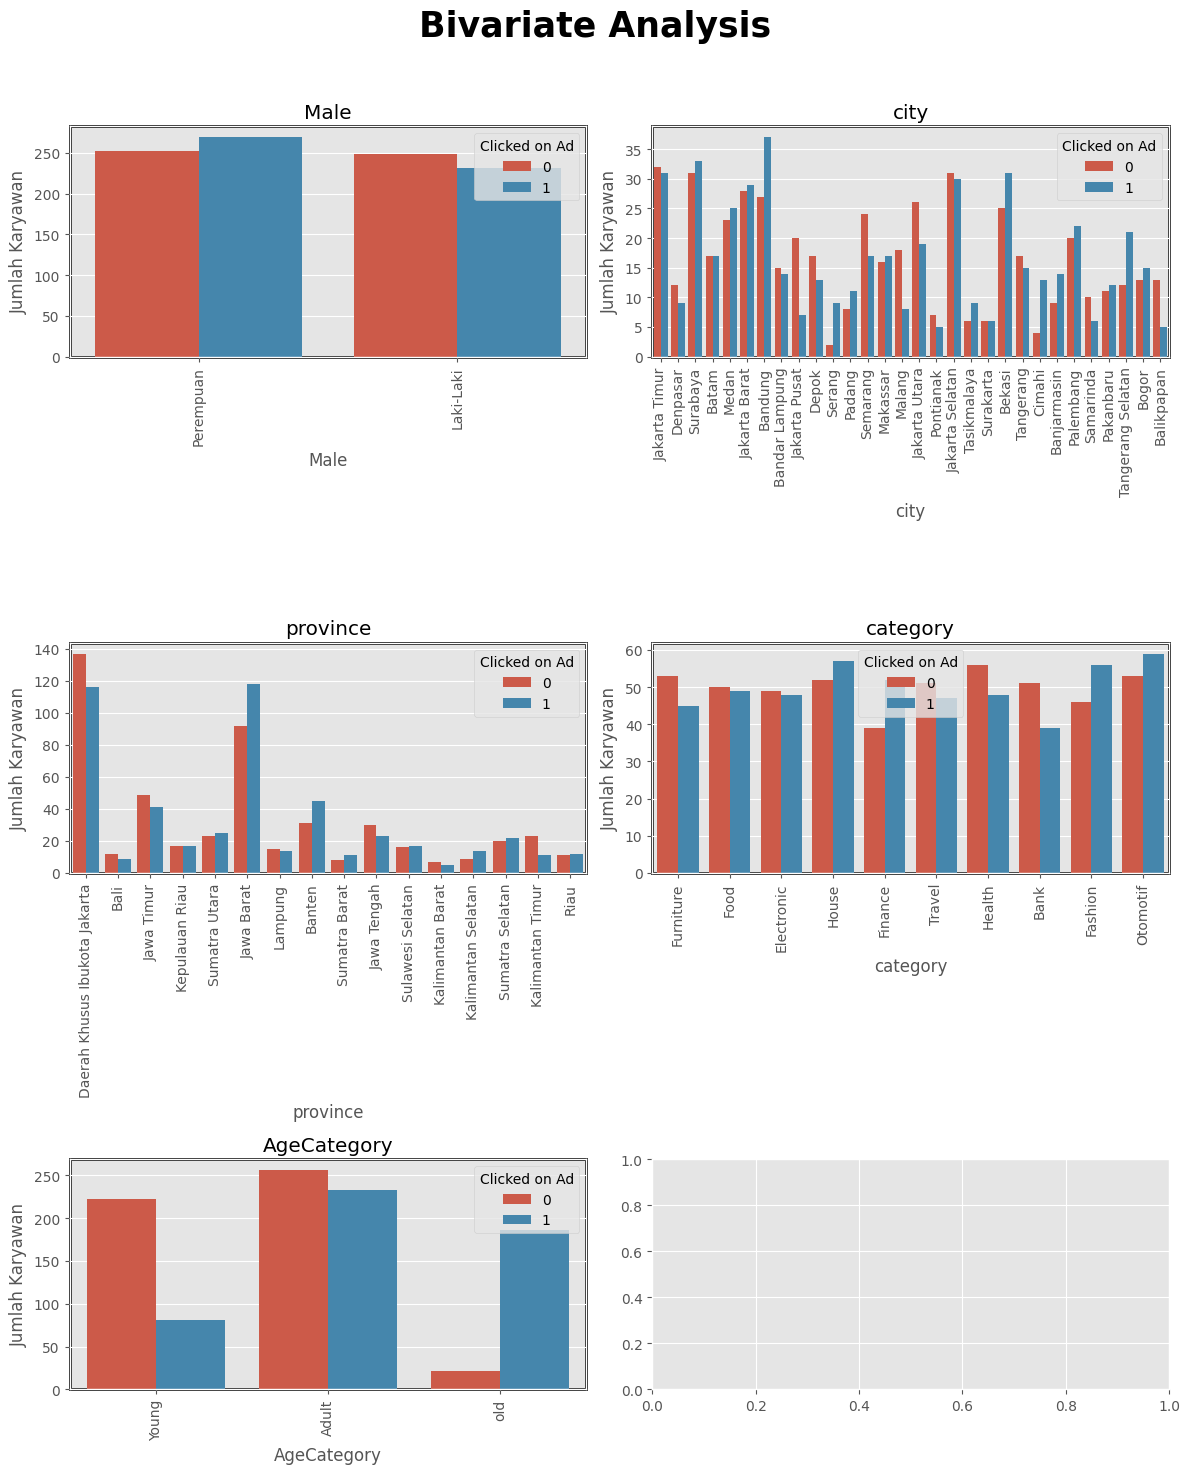

In [134]:
# Set style for plots
plt.style.use('ggplot')

# Number of rows and columns for the subplot grid
n_rows, n_cols = 3, 2

# Create the figure and subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 15))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Title for the entire figure
fig.suptitle('Bivariate Analysis', fontsize=25, fontweight='bold')

# Iterate through each categorical variable and plot
for i, column in enumerate(cat_var):
    ax = axes[i]  # Select the appropriate subplot axis

    # Create the countplot for the current column
    sns.countplot(x=df[column], hue=df['Clicked on Ad'], ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels

    # Change y-axis label to 'Jumlah Karyawan' for each subplot
    ax.set_ylabel('Jumlah Karyawan', fontsize=12)

    ax.patch.set_edgecolor('black')  # Set border color
    ax.patch.set_linewidth(2) 

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **Data Preparation**

## Label Encoding

In [135]:
df_encoded = df.copy()

In [136]:
df_encoded[cat_var].nunique()

Male            2
city           30
province       16
category       10
AgeCategory     3
dtype: int64

In [137]:
# Kolom untuk one-hot encoding
one_hot_columns = ['Male', 'category', 'AgeCategory']

# Kolom untuk label encoding
label_encode_columns = ['city', 'province']

# One-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_columns)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in label_encode_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

In [138]:
df_encoded.drop(['Timestamp'], axis=1, inplace=True)

In [139]:
df_encoded.drop(['Area Income'], axis=1, inplace=True)

In [140]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Daily Internet Usage      1000 non-null   float64
 3   Clicked on Ad             1000 non-null   int64  
 4   city                      1000 non-null   int64  
 5   province                  1000 non-null   int64  
 6   Timestamp_month           1000 non-null   int32  
 7   Timestamp_day             1000 non-null   int32  
 8   HourOfDay                 1000 non-null   int32  
 9   TimeSpentToInternetUsage  1000 non-null   float64
 10  Male_Laki-Laki            1000 non-null   bool   
 11  Male_Perempuan            1000 non-null   bool   
 12  category_Bank             1000 non-null   bool   
 13  category_Electronic       1000 non-null   bool   
 14  category_

In [141]:
df_encoded.columns

Index(['Daily Time Spent on Site', 'Age', 'Daily Internet Usage',
       'Clicked on Ad', 'city', 'province', 'Timestamp_month', 'Timestamp_day',
       'HourOfDay', 'TimeSpentToInternetUsage', 'Male_Laki-Laki',
       'Male_Perempuan', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel', 'AgeCategory_Young',
       'AgeCategory_Adult', 'AgeCategory_old'],
      dtype='object')

## Feature Selection

In [142]:

# Create an instance of SelectKBest with k=40 and chi-squared scoring function
k = 15
selector = SelectKBest(score_func=chi2, k=k)

X = df_encoded.drop(['Clicked on Ad'], axis=1)
y = df_encoded['Clicked on Ad']

# Fit the selector to your data and transform your features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['Daily Time Spent on Site', 'Age', 'Daily Internet Usage', 'HourOfDay',
       'Male_Laki-Laki', 'Male_Perempuan', 'category_Bank', 'category_Fashion',
       'category_Finance', 'category_Furniture', 'category_Health',
       'category_Otomotif', 'AgeCategory_Young', 'AgeCategory_Adult',
       'AgeCategory_old'],
      dtype='object')


In [143]:
selected_feature_indices

array([ 0,  1,  2,  7,  9, 10, 11, 13, 14, 16, 17, 19, 21, 22, 23])

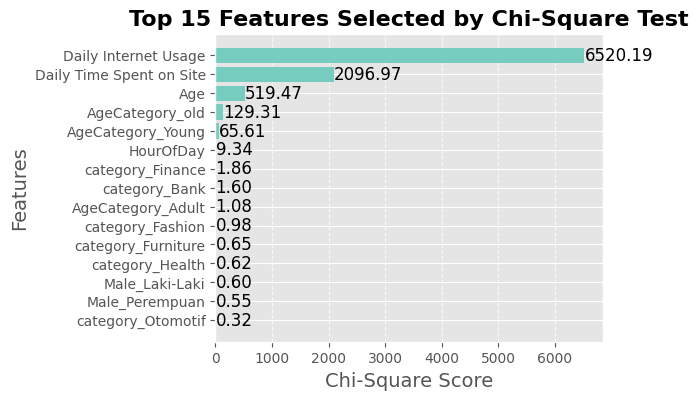

In [145]:

# Get feature scores
feature_scores = selector.scores_[selected_feature_indices]

# Sort features by score (optional)
sorted_indices = np.argsort(feature_scores)[::-1]  # Sort in descending order
sorted_features = selected_feature_names[sorted_indices]
sorted_scores = feature_scores[sorted_indices]

# Plot the feature scores
plt.figure(figsize=(5, 4), facecolor='none')  # Transparent background
bars = plt.barh(sorted_features, sorted_scores, color='#76ccbf')

# Add data labels to the bars
for bar, score in zip(bars, sorted_scores):
    plt.text(bar.get_width() + 0.5,  # X position
             bar.get_y() + bar.get_height()/2,  # Y position (center of the bar)
             f"{score:.2f}",  # Format the score with 2 decimal places
             va='center', ha='left', fontsize=12, color='black')

# Formatting
plt.xlabel("Chi-Square Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title(f"Top {k} Features Selected by Chi-Square Test", fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Highest score on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


I will use top 5 features with highest chi-square score.

In [146]:
selected_feature = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage', 'AgeCategory_Young', 'AgeCategory_old']
X = df_encoded[selected_feature]


In [159]:
X.head()

,Daily Time Spent on Site,Age,Daily Internet Usage,AgeCategory_Young,AgeCategory_old
0,68.95,35,256.09,False,False
1,80.23,31,193.77,False,False
2,69.47,26,236.50,True,False
3,74.15,29,245.89,True,False
4,68.37,35,225.58,False,False


## Data Splitting

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the split details
print("Data Split Details:")
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing Samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

Data Split Details:
Total Samples: 1000
Training Samples: 800 (80.00%)
Testing Samples: 200 (20.00%)


In [149]:
X_test.shape

(200, 5)

## Data Scaling

In [ ]:

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on X_train and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test based on the scaler fitted on X_train
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrame with the appropriate column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [151]:
X_train_scaled.shape

(800, 5)

In [152]:
X_test_scaled.shape

(200, 5)

# **Machine Learning**

In [153]:
k = 15
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a list of models
models = [
    ("Support Vector Machine", SVC(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42))
]

# Initialize a list to store the results
results = []

# Train and evaluate all models with feature selection
for model_name, model in models:
    # Train the model with selected features
    model.fit(X_train_selected, y_train)

    # Train predictions (for train score)
    y_train_pred = model.predict(X_train_selected)

    # Test predictions
    y_test_pred = model.predict(X_test_selected)

    # Calculate train scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    # Calculate test scores
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)

    # Append the results to the list
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": accuracy,
        "Train Precision": train_precision,
        "Test Precision": precision,
        "Train Recall": train_recall,
        "Test Recall": recall,
        "Train F1 Score": train_f1,
        "Test F1 Score": f1,
        "Train ROC AUC": train_roc_auc,
        "Test ROC AUC": roc_auc
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC AUC,Test ROC AUC
0,Support Vector Machine,0.9625,0.945,0.989101,0.962963,0.933162,0.936937,0.960317,0.949772,0.961715,0.945997
1,Gradient Boosting,0.9975,0.930,1.000000,0.944954,0.994859,0.927928,0.997423,0.936364,0.997429,0.930256
2,Decision Tree,1.0000,0.915,1.000000,0.927273,1.000000,0.918919,1.000000,0.923077,1.000000,0.914516
3,Random Forest,1.0000,0.935,1.000000,0.945455,1.000000,0.936937,1.000000,0.941176,1.000000,0.934761
4,Logistic Regression,0.9550,0.940,0.968170,0.954128,0.938303,0.936937,0.953003,0.945455,0.954553,0.940379


## Cross Validation

In [154]:

# Define models
models = {
    'Support Vector Machine' : SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Define evaluation metrics
scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': make_scorer(roc_auc_score),
    'accuracy': make_scorer(accuracy_score),
    'f1': 'f1'
}

# Initialize an empty list to store results
results = []

# Perform 10-fold cross-validation for each model
for model_name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

    # Calculate the mean and standard deviation of metrics
    metrics = {
        "Model": model_name,
        "Precision Mean": cv_results['test_precision'].mean(),
        "Precision Std": cv_results['test_precision'].std(),
        "Recall Mean": cv_results['test_recall'].mean(),
        "Recall Std": cv_results['test_recall'].std(),
        "ROC-AUC Mean": cv_results['test_roc_auc'].mean(),
        "ROC-AUC Std": cv_results['test_roc_auc'].std(),
        "Accuracy Mean": cv_results['test_accuracy'].mean(),
        "Accuracy Std": cv_results['test_accuracy'].std(),
        "F1 Mean": cv_results['test_f1'].mean(),
        "F1 Std": cv_results['test_f1'].std()
    }

    results.append(metrics)

# Convert results into a DataFrame
summary_df = pd.DataFrame(results)

summary_df


,Model,Precision Mean,Precision Std,Recall Mean,Recall Std,ROC-AUC Mean,ROC-AUC Std,Accuracy Mean,Accuracy Std,F1 Mean,F1 Std
0,Support Vector Machine,0.986558,0.018078,0.928003,0.034053,0.957904,0.020448,0.95875,0.020194,0.956055,0.021602
1,Random Forest,0.964318,0.022802,0.948516,0.025850,0.957214,0.011582,0.95750,0.011456,0.955885,0.011949
2,Logistic Regression,0.968989,0.026877,0.938259,0.030876,0.954524,0.019621,0.95500,0.019526,0.952911,0.020124
3,Gradient Boosting,0.961355,0.020124,0.943387,0.027773,0.953430,0.013935,0.95375,0.013750,0.951890,0.014491
4,Decision Tree,0.941445,0.024019,0.938394,0.039993,0.941177,0.021958,0.94125,0.021687,0.939325,0.023035


I chose Precision as the metric for predicting Clicked Ads customers to ensure the model minimizes wasted ad spend on users who won’t click. The Support Vector Machine (SVM) model achieved the highest precision score. Next, I will perform cross-validation on the SVC model.

      Metric  Mean Value
0   Accuracy    0.956250
1  Precision    0.983850
2     Recall    0.925408
3   F1 Score    0.953489
4    ROC-AUC    0.986553


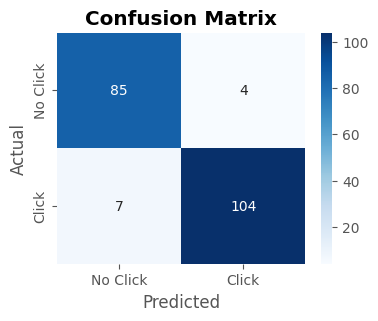

Text(0, 0.5, 'True Positive Rate')

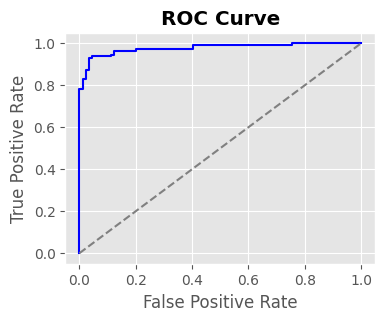

In [155]:

# Initialize SVC model with probability=True to enable predict_proba
model = SVC(random_state=42, probability=True)

# Perform cross-validation
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], return_train_score=False)

# Calculate mean and std for each metric
metrics = {
    "Accuracy": cv_results['test_accuracy'].mean(),
    "Precision": cv_results['test_precision'].mean(),
    "Recall": cv_results['test_recall'].mean(),
    "F1 Score": cv_results['test_f1'].mean(),
    "ROC-AUC": cv_results['test_roc_auc'].mean()
}

# Print cross-validation metrics
cv_metrics_df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Mean Value"])
print(cv_metrics_df)

# Fit the model on the entire training data to make predictions on test data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Click", "Click"], yticklabels=["No Click", "Click"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontweight='bold')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve', fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


## Feature Importance

In [156]:
model = SVC(random_state=42, probability=True)
print(model.get_params())


{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


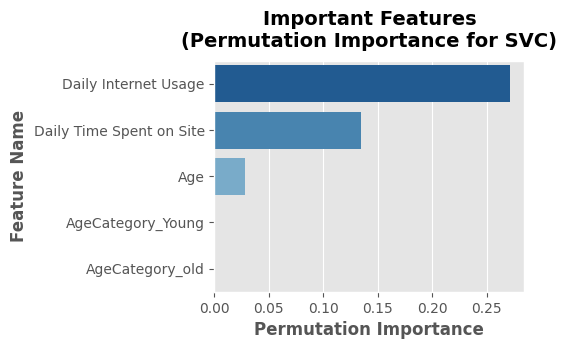

In [ ]:

# Train SVC (any kernel)
model = SVC(kernel='rbf', probability=True, random_state=42)  # Using 'rbf' kernel
model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, scoring='accuracy')

# Create a DataFrame to store feature importance
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': perm_importance.importances_mean})

# Sort features by importance
sorted_feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(4, 3))
sns.barplot(x=sorted_feature_df['Importance'].head(10), y=sorted_feature_df['Feature'].head(10), palette='Blues_r')
plt.xlabel('Permutation Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature Name', fontsize=12, fontweight='bold')
plt.title('Important Features\n(Permutation Importance for SVC)', fontsize=14, fontweight='bold', pad=10)
plt.show()


In [158]:
feature_df

,Feature,Importance
0,Daily Time Spent on Site,0.135
1,Age,0.028
2,Daily Internet Usage,0.271
3,AgeCategory_Young,0.000
4,AgeCategory_old,0.000


The feature importance analysis has identified that **`Daily Internet Usage`** and **`Daily Time on Site`** are the two most influential factors affecting user behavior and ad click-through rates.
* `Daily Internet Usage`: This feature is a critical determinant of user engagement. Users who spend more time online tend to be more active and attentive. This is a strong indicator of their responsiveness to ads.
* `Daily Time on Site`: The time users spend on the site directly impacts their exposure to ads. Longer visits provide more opportunities for users to interact with advertisements.
These two factors, `Daily Internet Usage` and `Daily Time on Site` are highly valuable in understanding user behavior and optimizing ad campaigns.